# LSTM For Stock Prediction Based on Volatility
### Reetom Gangopadhyay, Daniel Keller, Vignesh Somjit, Matthew Levine

In [1]:
# import yfinance as yf # FROM YFINANCE I CREATED A CSV EXTERNALLY, RUN COMMENTED CODE TO USE YFINANCE.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *


2024-11-27 11:55:06.540781: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 11:55:06.925186: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-27 11:55:06.988240: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


     Date         Open         High          Low        Close    Adj Close  \
0  3/5/07  1387.109985  1391.859985  1373.969971  1374.119995  1374.119995   
1  3/6/07  1374.060059  1397.900024  1374.060059  1395.410034  1395.410034   
2  3/7/07  1395.020020  1401.160034  1390.640015  1391.969971  1391.969971   
3  3/8/07  1391.880005  1407.930054  1391.880005  1401.890015  1401.890015   
4  3/9/07  1401.890015  1410.150024  1397.300049  1402.839966  1402.839966   

       Volume  Log_Return  Diff_Log_Return  
0  3480520000   -0.009452         0.002016  
1  3358160000    0.015375         0.024827  
2  3141350000   -0.002468        -0.017843  
3  3014850000    0.007101         0.009570  
4  2623050000    0.000677        -0.006424  


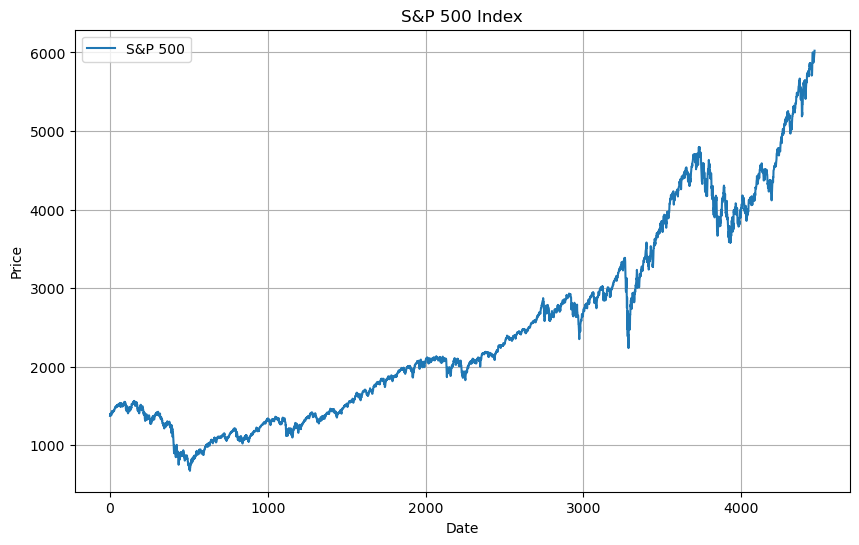

In [2]:
#import yfinance as yf 
import numpy as np  
import pandas as pd   
import matplotlib.pyplot as plt


# Fetch S&P 500 data USE IF INSTALLED YFINANCE
#sp500_data = yf.download('^GSPC')

# Read the CSV file
data = pd.read_csv('sp500.csv')

print(data.head())

plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='S&P 500')
plt.title('S&P 500 Index')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

/scratch/1323466.1.p100/ipykernel_2336975/3164939356.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Returns'].iloc[1:] = np.diff(np.log(data['Close']))
/scratch/1323466.1.p100/ipykernel_2336975/3164939356.py:4: SettingWithCopyWarn

1       0.015375
2      -0.002468
3       0.007101
4       0.000677
5       0.002677
          ...   
4461    0.000022
4462    0.005326
4463    0.003462
4464    0.003016
4465    0.005706
Name: Returns, Length: 4465, dtype: float64


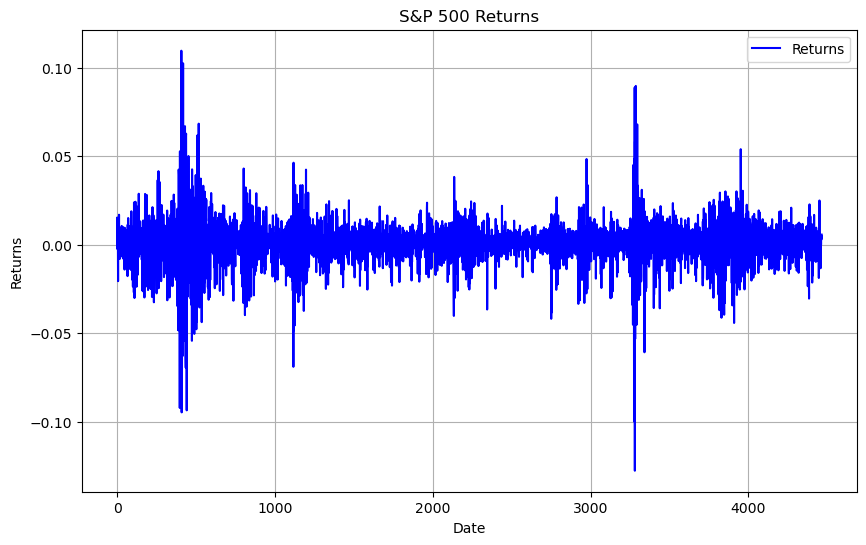

In [3]:
data['Returns'] = 0

# Calculate log returns
data['Returns'].iloc[1:] = np.diff(np.log(data['Close']))

#data['Returns'].iloc[1:]

returns = data['Returns'].iloc[1:]

print(returns)
# print(data.head())

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Returns'], label='Returns', color='blue')
plt.title('S&P 500 Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


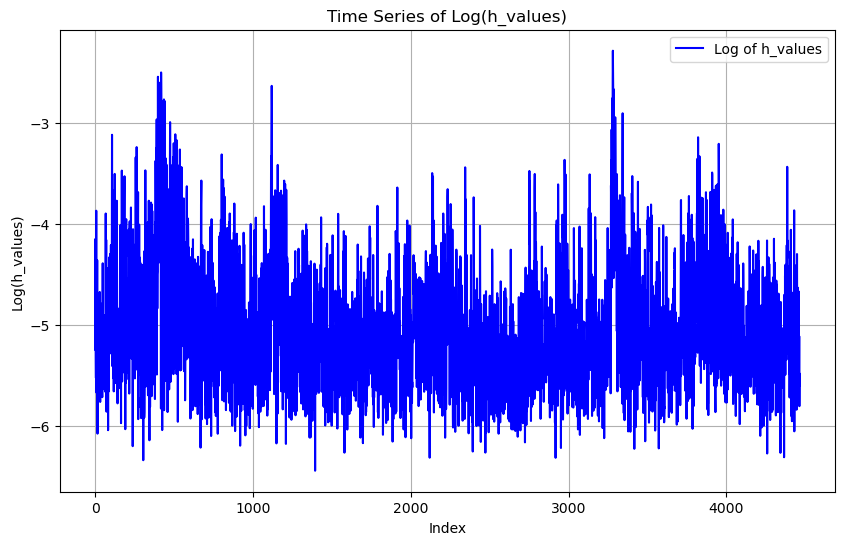

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Read the CSV file
h_vals = pd.read_csv('h_vals.csv')

# Step 2: Take the natural logarithm of each value
h_vals['log_h'] = np.log(h_vals['h_values'])

# Step 3: Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(h_vals['log_h'], label='Log of h_values', color='blue')
plt.xlabel('Index')
plt.ylabel('Log(h_values)')
plt.title('Time Series of Log(h_values)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/21


/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



3160/3160 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 2/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - loss: 4.9364e-04 - val_loss: 0.0060
Epoch 3/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 4.3074e-04 - val_loss: 8.0018e-04
Epoch 4/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 3.5779e-04 - val_loss: 0.0019
Epoch 5/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 2.9800e-04 - val_loss: 0.0019
Epoch 6/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 2.6552e-04 - val_loss: 0.0011
Epoch 7/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 2.3925e-04 - val_loss: 0.0013
Epoch 8/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 2.0920e-04 - val_loss: 0.0024
Epoch 9/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.9661e-04 - val_loss: 3.6442e-04
Epoch 10/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.9536e-04 - val_loss: 0.0047
Epoch 11/21
3160/3160 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.5199e-04 -

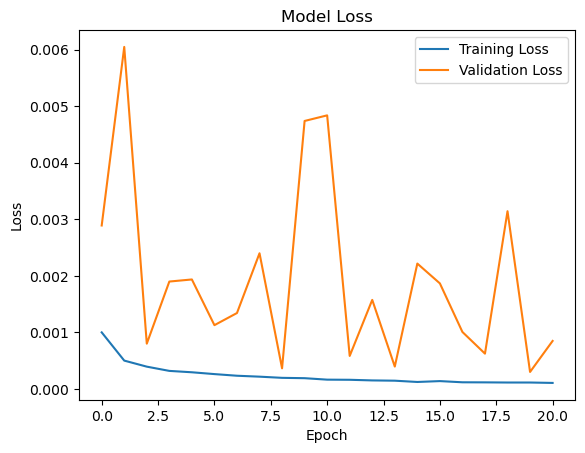

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE LSTM: 301.7263965768219


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objs as go

def prepare_data(data, h_vals):
    data['Returns'] = np.log(data['Close']).diff()  # Calculate log returns
    data.dropna(inplace=True)  # Drop missing values
    
    # Add log_h values directly to the main data without merging on x_vals
    data['log_h'] = h_vals['log_h'].values[:len(data)]
    
    return data[['Close', 'Returns', 'log_h']]

def lstm(stock_name, data, h_vals):
    # Prepare the data
    data = prepare_data(data, h_vals)
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * 0.8))

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Prepare training data
    train_data = scaled_data[:training_data_len]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, :])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.35))
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    history = model.fit(x_train, y_train, batch_size=1, epochs=21, validation_split=0.1)

    # Plot training & validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

    # Prepare testing data
    test_data = scaled_data[training_data_len - 60:]
    x_test = []
    y_test = dataset[training_data_len:, 0]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, :])

    x_test = np.array(x_test)

    # Make predictions
    predictions = model.predict(x_test)
    # Reshape predictions to match y_test shape
    predictions = predictions.reshape(-1, 1)
    # Inverse transform predictions and concatenate with zeros to match the original shape
    predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1))[:, 0]

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
    print(f'RMSE LSTM: {rmse}')

    # Plot results
    train = data[:training_data_len]
    valid = data[training_data_len:]
    x_valid = list(range(training_data_len, len(dataset)))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Close'], mode='lines+markers', name='Train', marker_color='#39304A'))
    fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines+markers', name='Valid', marker_color='#A98D75'))
    fig.add_trace(go.Scatter(x=valid.index, y=predictions, mode='lines+markers', name='Predictions', marker_color='#FFAA00'))
    fig.show()

    return predictions, rmse

# Example usage
data = pd.read_csv('sp500.csv')
h_vals = pd.read_csv('h_vals.csv')
h_vals['log_h'] = np.log(h_vals['h_values'])
predictions, rmse = lstm('S&P 500', data, h_vals)

Epoch 1/21


/share/pkg.8/academic-ml/fall-2024/install/fall-2024-tf/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



2634/2634 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.0030 - val_loss: 0.0018
Epoch 2/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 4.3703e-04 - val_loss: 2.8512e-04
Epoch 3/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 2.6924e-04 - val_loss: 2.9308e-04
Epoch 4/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 2.2100e-04 - val_loss: 4.2554e-04
Epoch 5/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.6904e-04 - val_loss: 5.6815e-04
Epoch 6/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.6001e-04 - val_loss: 5.0438e-04
Epoch 7/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.5517e-04 - val_loss: 2.4224e-04
Epoch 8/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.2536e-04 - val_loss: 6.3674e-04
Epoch 9/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.2435e-04 - val_loss: 2.9256e-04
Epoch 10/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 1.1442e-04 - val_loss: 2.4516e-04
Epoch 11/21
2634/2634 ━━━━━━━━━━━━━━━━━━━━ 18s 7

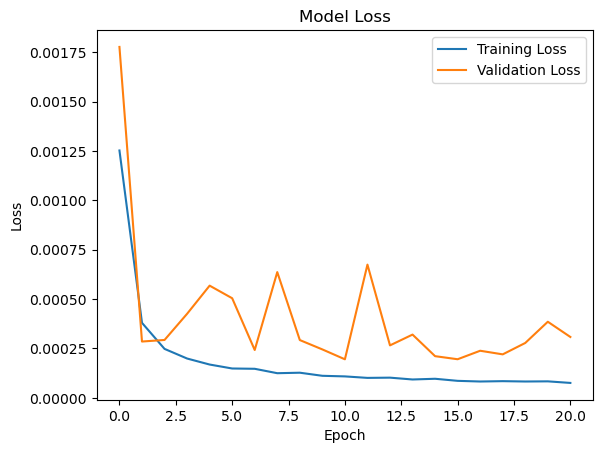

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
RMSE LSTM: 535.7297499627246


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.graph_objs as go

def prepare_data(data, h_vals):
    data['Returns'] = np.log(data['Close']).diff()  # Calculate log returns
    data.dropna(inplace=True)  # Drop missing values
    
    # Add log_h values directly to the main data without merging on x_vals
    data['log_h'] = h_vals['log_h'].values[:len(data)]
    
    return data[['Close', 'Returns', 'log_h']]

def lstm(stock_name, data, h_vals):
    # Prepare the data
    data = prepare_data(data, h_vals)
    dataset = data.values
    training_data_len = int(np.ceil(len(dataset) * 0.8))

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Prepare training data
    train_data = scaled_data[:training_data_len]
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i - 60:i, :])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dropout(0.35))
    model.add(LSTM(units=64, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(units=25, activation='relu'))
    model.add(Dense(units=1))

    # Compile the model
    from tensorflow.keras.optimizers import Adam
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    # Train the model
    history = model.fit(x_train, y_train, batch_size=1, epochs=21, validation_split=0.25)

    # Plot training & validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.show()

    # Prepare testing data
    test_data = scaled_data[training_data_len - 60:]
    x_test = []
    y_test = dataset[training_data_len:, 0]

    for i in range(60, len(test_data)):
        x_test.append(test_data[i - 60:i, :])

    x_test = np.array(x_test)

    # Make predictions
    predictions = model.predict(x_test)
    # Reshape predictions to match y_test shape
    predictions = predictions.reshape(-1, 1)
    # Inverse transform predictions and concatenate with zeros to match the original shape
    predictions = scaler.inverse_transform(np.concatenate((predictions, np.zeros((len(predictions), 2))), axis=1))[:, 0]

    # Calculate RMSE
    rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
    print(f'RMSE LSTM: {rmse}')

    # Plot results
    train = data[:training_data_len]
    valid = data[training_data_len:]
    x_valid = list(range(training_data_len, len(dataset)))

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['Close'], mode='lines+markers', name='Train', marker_color='#39304A'))
    fig.add_trace(go.Scatter(x=valid.index, y=valid['Close'], mode='lines+markers', name='Valid', marker_color='#A98D75'))
    fig.add_trace(go.Scatter(x=valid.index, y=predictions, mode='lines+markers', name='Predictions', marker_color='#FFAA00'))
    fig.show()

    return predictions, rmse

# Example usage
data = pd.read_csv('sp500.csv')
h_vals = pd.read_csv('h_vals.csv')
h_vals['log_h'] = np.log(h_vals['h_values'])
predictions, rmse = lstm('S&P 500', data, h_vals)
